
# Overfitting


In [48]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.callbacks import ModelCheckpoint

np.random.seed(1)




## Generate test data

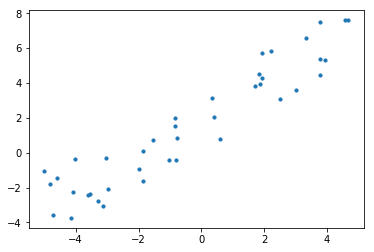

In [49]:
n = 40
beta = 10
add = -5
noise = 4
x = np.random.random(n) * beta + add
x = np.sort(x)
y = x + np.random.random(n) * noise

plt.scatter(x, y, s = 10)




## Normalization


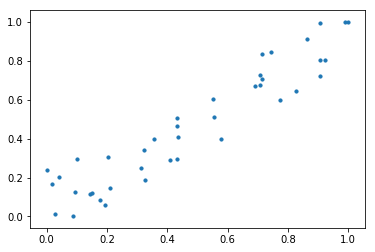

In [50]:
dataset = np.transpose(np.array([x,y]))

scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

plt.scatter(dataset_scaled[:,0], dataset_scaled[:,1], s = 10)
       




## Split in training and test dataset

Training dataset will adapt model parameters.

Test parameter set is used to check model quality.

Test dataset should only be used once!



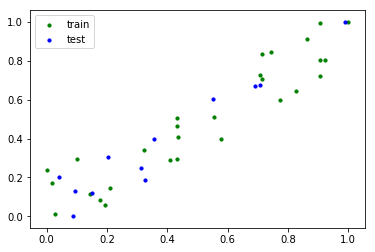

In [51]:
train, test = train_test_split(dataset_scaled,train_size = 0.7,test_size = 0.3)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train[:,0], train[:,1], s = 10, c = "green", label = "train")
ax1.scatter(test[:,0], test[:,1], s = 10, c = "blue", label = "test")
plt.legend(loc='upper left');
plt.show()


       

## Training model

In [52]:
act = 'relu'
nodes = 40
model = Sequential()
model.add(Dense(nodes , activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['accuracy'])

x = train[:,0]
y = train[:,1]

index = np.random.randint(0, len(x), round(0.8 * len(x)))
        
x_t = x[index]
y_t = y[index]
         
mask = np.ones(len(x),dtype=bool) #np.ones_like(a,dtype=bool)
mask[index] = False
         
x_val = x[mask]
y_val = y[mask]

epochs = 2000

filepath="../../models/weights-improvement-{epoch:02d}-{val_loss:.4f}.hdf5"

checkpoint = ModelCheckpoint(filepath, 
                             monitor = 'loss', 
                             verbose = 1,
                             save_best_only = True, 
                             mode = 'min')

callbacks_list = [checkpoint]

history = model.fit(x_t, y_t, 
                    epochs = epochs,
                    batch_size = 1, 
                    validation_data = (x_val, y_val), 
                    callbacks = callbacks_list)



Train on 22 samples, validate on 13 samples
Epoch 1/2000
22/22 [==============================] - 5s 249ms/step - loss: 0.0757 - acc: 0.0455 - val_loss: 0.0953 - val_acc: 0.0000e+00

Epoch 00001: loss improved from inf to 0.07570, saving model to ../../models/weights-improvement-01-0.0953.hdf5
Epoch 2/2000
22/22 [==============================] - 0s 7ms/step - loss: 0.0744 - acc: 0.0909 - val_loss: 0.0936 - val_acc: 0.0000e+00

Epoch 00002: loss improved from 0.07570 to 0.07442, saving model to ../../models/weights-improvement-02-0.0936.hdf5
Epoch 3/2000
22/22 [==============================] - 0s 7ms/step - loss: 0.0678 - acc: 0.0909 - val_loss: 0.0851 - val_acc: 0.0000e+00

Epoch 00003: loss improved from 0.07442 to 0.06775, saving model to ../../models/weights-improvement-03-0.0851.hdf5
Epoch 4/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0519 - acc: 0.0909 - val_loss: 0.0716 - val_acc: 0.0000e+00

Epoch 00004: loss improved from 0.06775 to 0.05187, saving mod

22/22 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0909 - val_loss: 0.0111 - val_acc: 0.0000e+00

Epoch 00039: loss did not improve from 0.00783
Epoch 40/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0909 - val_loss: 0.0114 - val_acc: 0.0000e+00

Epoch 00040: loss did not improve from 0.00783
Epoch 41/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0083 - acc: 0.0909 - val_loss: 0.0113 - val_acc: 0.0000e+00

Epoch 00041: loss did not improve from 0.00783
Epoch 42/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0088 - acc: 0.0909 - val_loss: 0.0113 - val_acc: 0.0000e+00

Epoch 00042: loss did not improve from 0.00783
Epoch 43/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0090 - acc: 0.0909 - val_loss: 0.0143 - val_acc: 0.0000e+00

Epoch 00043: loss did not improve from 0.00783
Epoch 44/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0104 - acc: 

22/22 [==============================] - 0s 5ms/step - loss: 0.0064 - acc: 0.0909 - val_loss: 0.0172 - val_acc: 0.0000e+00

Epoch 00081: loss improved from 0.00664 to 0.00637, saving model to ../../models/weights-improvement-81-0.0172.hdf5
Epoch 82/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0069 - acc: 0.0909 - val_loss: 0.0173 - val_acc: 0.0000e+00

Epoch 00082: loss did not improve from 0.00637
Epoch 83/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.0062 - acc: 0.0909 - val_loss: 0.0175 - val_acc: 0.0000e+00

Epoch 00083: loss improved from 0.00637 to 0.00625, saving model to ../../models/weights-improvement-83-0.0175.hdf5
Epoch 84/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0064 - acc: 0.0909 - val_loss: 0.0172 - val_acc: 0.0000e+00

Epoch 00084: loss did not improve from 0.00625
Epoch 85/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0065 - acc: 0.0909 - val_loss: 0.0177 - val_acc: 0.0000e+00

22/22 [==============================] - 0s 5ms/step - loss: 0.0095 - acc: 0.0909 - val_loss: 0.0137 - val_acc: 0.0000e+00

Epoch 00124: loss did not improve from 0.00625
Epoch 125/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0096 - acc: 0.0909 - val_loss: 0.0136 - val_acc: 0.0000e+00

Epoch 00125: loss did not improve from 0.00625
Epoch 126/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0090 - acc: 0.0909 - val_loss: 0.0252 - val_acc: 0.0000e+00

Epoch 00126: loss did not improve from 0.00625
Epoch 127/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0069 - acc: 0.0909 - val_loss: 0.0162 - val_acc: 0.0000e+00

Epoch 00127: loss did not improve from 0.00625
Epoch 128/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0068 - acc: 0.0909 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 00128: loss did not improve from 0.00625
Epoch 129/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0073 - 

22/22 [==============================] - 0s 5ms/step - loss: 0.0069 - acc: 0.0909 - val_loss: 0.0183 - val_acc: 0.0000e+00

Epoch 00168: loss did not improve from 0.00600
Epoch 169/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.0063 - acc: 0.0909 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 00169: loss did not improve from 0.00600
Epoch 170/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0071 - acc: 0.0909 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 00170: loss did not improve from 0.00600
Epoch 171/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0065 - acc: 0.0909 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 00171: loss did not improve from 0.00600
Epoch 172/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0058 - acc: 0.0909 - val_loss: 0.0194 - val_acc: 0.0000e+003       

Epoch 00172: loss improved from 0.00600 to 0.00576, saving model to ../../models/weights-improvement-172-0.0194.hdf5
Epoch 1

22/22 [==============================] - 0s 6ms/step - loss: 0.0090 - acc: 0.0909 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 00211: loss did not improve from 0.00576
Epoch 212/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0074 - acc: 0.0909 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 00212: loss did not improve from 0.00576
Epoch 213/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0084 - acc: 0.0909 - val_loss: 0.0222 - val_acc: 0.0000e+00

Epoch 00213: loss did not improve from 0.00576
Epoch 214/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0063 - acc: 0.0909 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 00214: loss did not improve from 0.00576
Epoch 215/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0072 - acc: 0.0909 - val_loss: 0.0256 - val_acc: 0.0000e+00

Epoch 00215: loss did not improve from 0.00576
Epoch 216/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0074 - 

22/22 [==============================] - 0s 5ms/step - loss: 0.0065 - acc: 0.0909 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 00255: loss did not improve from 0.00576
Epoch 256/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0070 - acc: 0.0909 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 00256: loss did not improve from 0.00576
Epoch 257/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0089 - acc: 0.0909 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 00257: loss did not improve from 0.00576
Epoch 258/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0079 - acc: 0.0909 - val_loss: 0.0274 - val_acc: 0.0000e+00

Epoch 00258: loss did not improve from 0.00576
Epoch 259/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0109 - acc: 0.0909 - val_loss: 0.0192 - val_acc: 0.0000e+00

Epoch 00259: loss did not improve from 0.00576
Epoch 260/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0143 - 

22/22 [==============================] - 0s 6ms/step - loss: 0.0080 - acc: 0.0909 - val_loss: 0.0178 - val_acc: 0.0000e+00

Epoch 00299: loss did not improve from 0.00576
Epoch 300/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.0067 - acc: 0.0909 - val_loss: 0.0171 - val_acc: 0.0000e+00

Epoch 00300: loss did not improve from 0.00576
Epoch 301/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0061 - acc: 0.0909 - val_loss: 0.0189 - val_acc: 0.0000e+00

Epoch 00301: loss did not improve from 0.00576
Epoch 302/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.0063 - acc: 0.0909 - val_loss: 0.0176 - val_acc: 0.0000e+00

Epoch 00302: loss did not improve from 0.00576
Epoch 303/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0063 - acc: 0.0909 - val_loss: 0.0174 - val_acc: 0.0000e+00

Epoch 00303: loss did not improve from 0.00576
Epoch 304/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0066 - 

22/22 [==============================] - 0s 4ms/step - loss: 0.0065 - acc: 0.0909 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 00343: loss did not improve from 0.00576
Epoch 344/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0075 - acc: 0.0909 - val_loss: 0.0167 - val_acc: 0.0000e+00

Epoch 00344: loss did not improve from 0.00576
Epoch 345/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0144 - acc: 0.0909 - val_loss: 0.0445 - val_acc: 0.0000e+00

Epoch 00345: loss did not improve from 0.00576
Epoch 346/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0153 - acc: 0.0909 - val_loss: 0.0253 - val_acc: 0.0000e+00

Epoch 00346: loss did not improve from 0.00576
Epoch 347/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0120 - acc: 0.0909 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 00347: loss did not improve from 0.00576
Epoch 348/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0112 - 

22/22 [==============================] - 0s 4ms/step - loss: 0.0062 - acc: 0.0909 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 00387: loss did not improve from 0.00576
Epoch 388/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0066 - acc: 0.0909 - val_loss: 0.0212 - val_acc: 0.0000e+00

Epoch 00388: loss did not improve from 0.00576
Epoch 389/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0077 - acc: 0.0909 - val_loss: 0.0219 - val_acc: 0.0000e+00

Epoch 00389: loss did not improve from 0.00576
Epoch 390/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.0909 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 00390: loss did not improve from 0.00576
Epoch 391/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 0.0909 - val_loss: 0.0201 - val_acc: 0.0000e+00

Epoch 00391: loss did not improve from 0.00576
Epoch 392/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0075 - 

22/22 [==============================] - 0s 5ms/step - loss: 0.0066 - acc: 0.0909 - val_loss: 0.0226 - val_acc: 0.0000e+00

Epoch 00431: loss did not improve from 0.00576
Epoch 432/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0061 - acc: 0.0909 - val_loss: 0.0243 - val_acc: 0.0000e+00

Epoch 00432: loss did not improve from 0.00576
Epoch 433/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0066 - acc: 0.0909 - val_loss: 0.0220 - val_acc: 0.0000e+00

Epoch 00433: loss did not improve from 0.00576
Epoch 434/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0063 - acc: 0.0909 - val_loss: 0.0247 - val_acc: 0.0000e+00

Epoch 00434: loss did not improve from 0.00576
Epoch 435/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0075 - acc: 0.0909 - val_loss: 0.0239 - val_acc: 0.0000e+00

Epoch 00435: loss did not improve from 0.00576
Epoch 436/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0066 - 

22/22 [==============================] - 0s 4ms/step - loss: 0.0078 - acc: 0.0909 - val_loss: 0.0169 - val_acc: 0.0000e+00

Epoch 00475: loss did not improve from 0.00558
Epoch 476/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0083 - acc: 0.0909 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 00476: loss did not improve from 0.00558
Epoch 477/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0069 - acc: 0.0909 - val_loss: 0.0172 - val_acc: 0.0000e+00

Epoch 00477: loss did not improve from 0.00558
Epoch 478/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0067 - acc: 0.0909 - val_loss: 0.0176 - val_acc: 0.0000e+00

Epoch 00478: loss did not improve from 0.00558
Epoch 479/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0061 - acc: 0.0909 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 00479: loss did not improve from 0.00558
Epoch 480/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0066 - 

22/22 [==============================] - 0s 5ms/step - loss: 0.0066 - acc: 0.0909 - val_loss: 0.0168 - val_acc: 0.0000e+00

Epoch 00519: loss did not improve from 0.00558
Epoch 520/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0062 - acc: 0.0909 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 00520: loss did not improve from 0.00558
Epoch 521/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0069 - acc: 0.0909 - val_loss: 0.0168 - val_acc: 0.0000e+00

Epoch 00521: loss did not improve from 0.00558
Epoch 522/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0064 - acc: 0.0909 - val_loss: 0.0166 - val_acc: 0.0000e+00

Epoch 00522: loss did not improve from 0.00558
Epoch 523/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0060 - acc: 0.0909 - val_loss: 0.0176 - val_acc: 0.0000e+00

Epoch 00523: loss did not improve from 0.00558
Epoch 524/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0060 - 

22/22 [==============================] - 0s 5ms/step - loss: 0.0063 - acc: 0.0909 - val_loss: 0.0190 - val_acc: 0.0000e+00

Epoch 00563: loss did not improve from 0.00558
Epoch 564/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0069 - acc: 0.0909 - val_loss: 0.0187 - val_acc: 0.0000e+00

Epoch 00564: loss did not improve from 0.00558
Epoch 565/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0070 - acc: 0.0909 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 00565: loss did not improve from 0.00558
Epoch 566/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0064 - acc: 0.0909 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 00566: loss did not improve from 0.00558
Epoch 567/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0061 - acc: 0.0909 - val_loss: 0.0192 - val_acc: 0.0000e+00

Epoch 00567: loss did not improve from 0.00558
Epoch 568/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0070 - 

22/22 [==============================] - 0s 4ms/step - loss: 0.0059 - acc: 0.0909 - val_loss: 0.0173 - val_acc: 0.0000e+00

Epoch 00607: loss did not improve from 0.00558
Epoch 608/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0066 - acc: 0.0909 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 00608: loss did not improve from 0.00558
Epoch 609/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0061 - acc: 0.0909 - val_loss: 0.0170 - val_acc: 0.0000e+00

Epoch 00609: loss did not improve from 0.00558
Epoch 610/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0059 - acc: 0.0909 - val_loss: 0.0173 - val_acc: 0.0000e+00

Epoch 00610: loss did not improve from 0.00558
Epoch 611/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0067 - acc: 0.0909 - val_loss: 0.0168 - val_acc: 0.0000e+00

Epoch 00611: loss did not improve from 0.00558
Epoch 612/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0063 - 

22/22 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 0.0909 - val_loss: 0.0451 - val_acc: 0.0000e+00

Epoch 00651: loss did not improve from 0.00558
Epoch 652/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0135 - acc: 0.0909 - val_loss: 0.0415 - val_acc: 0.0000e+00

Epoch 00652: loss did not improve from 0.00558
Epoch 653/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0092 - acc: 0.0909 - val_loss: 0.0317 - val_acc: 0.0000e+00

Epoch 00653: loss did not improve from 0.00558
Epoch 654/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0101 - acc: 0.0909 - val_loss: 0.0163 - val_acc: 0.0000e+00

Epoch 00654: loss did not improve from 0.00558
Epoch 655/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0092 - acc: 0.0909 - val_loss: 0.0310 - val_acc: 0.0000e+00

Epoch 00655: loss did not improve from 0.00558
Epoch 656/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0089 - 

22/22 [==============================] - 0s 4ms/step - loss: 0.0060 - acc: 0.0909 - val_loss: 0.0179 - val_acc: 0.0000e+00

Epoch 00695: loss did not improve from 0.00558
Epoch 696/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0144 - acc: 0.0909 - val_loss: 0.0225 - val_acc: 0.0000e+00

Epoch 00696: loss did not improve from 0.00558
Epoch 697/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0909 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 00697: loss did not improve from 0.00558
Epoch 698/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0078 - acc: 0.0909 - val_loss: 0.0186 - val_acc: 0.0000e+00

Epoch 00698: loss did not improve from 0.00558
Epoch 699/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0065 - acc: 0.0909 - val_loss: 0.0176 - val_acc: 0.0000e+00

Epoch 00699: loss did not improve from 0.00558
Epoch 700/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0060 - 

22/22 [==============================] - 0s 4ms/step - loss: 0.0068 - acc: 0.0909 - val_loss: 0.0230 - val_acc: 0.0000e+00

Epoch 00739: loss did not improve from 0.00558
Epoch 740/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0059 - acc: 0.0909 - val_loss: 0.0214 - val_acc: 0.0000e+00

Epoch 00740: loss did not improve from 0.00558
Epoch 741/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0060 - acc: 0.0909 - val_loss: 0.0210 - val_acc: 0.0000e+00

Epoch 00741: loss did not improve from 0.00558
Epoch 742/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0059 - acc: 0.0909 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 00742: loss did not improve from 0.00558
Epoch 743/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0058 - acc: 0.0909 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 00743: loss did not improve from 0.00558
Epoch 744/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0059 - 

22/22 [==============================] - 0s 5ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0185 - val_acc: 0.0000e+00

Epoch 00783: loss did not improve from 0.00547
Epoch 784/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0060 - acc: 0.0909 - val_loss: 0.0186 - val_acc: 0.0000e+00

Epoch 00784: loss did not improve from 0.00547
Epoch 785/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0069 - acc: 0.0909 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 00785: loss did not improve from 0.00547
Epoch 786/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0062 - acc: 0.0909 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 00786: loss did not improve from 0.00547
Epoch 787/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0061 - acc: 0.0909 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 00787: loss did not improve from 0.00547
Epoch 788/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0058 - 

Epoch 826/2000
22/22 [==============================] - 0s 8ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0179 - val_acc: 0.0000e+00

Epoch 00826: loss did not improve from 0.00508
Epoch 827/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.0057 - acc: 0.0909 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 00827: loss did not improve from 0.00508
Epoch 828/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0201 - val_acc: 0.0000e+00

Epoch 00828: loss did not improve from 0.00508
Epoch 829/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.0053 - acc: 0.0909 - val_loss: 0.0195 - val_acc: 0.0000e+00

Epoch 00829: loss did not improve from 0.00508
Epoch 830/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.0058 - acc: 0.0909 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 00830: loss did not improve from 0.00508
Epoch 831/2000
22/22 [==============================] - 0s 7ms/step - 

22/22 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 0.0909 - val_loss: 0.0158 - val_acc: 0.0000e+00

Epoch 00870: loss did not improve from 0.00508
Epoch 871/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0162 - val_acc: 0.0000e+00

Epoch 00871: loss did not improve from 0.00508
Epoch 872/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0161 - val_acc: 0.0000e+00

Epoch 00872: loss did not improve from 0.00508
Epoch 873/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0059 - acc: 0.0909 - val_loss: 0.0163 - val_acc: 0.0000e+00

Epoch 00873: loss did not improve from 0.00508
Epoch 874/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0059 - acc: 0.0909 - val_loss: 0.0165 - val_acc: 0.0000e+00

Epoch 00874: loss did not improve from 0.00508
Epoch 875/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0064 - 

22/22 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0222 - val_acc: 0.0000e+00

Epoch 00914: loss did not improve from 0.00508
Epoch 915/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0055 - acc: 0.0909 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 00915: loss did not improve from 0.00508
Epoch 916/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0061 - acc: 0.0909 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 00916: loss did not improve from 0.00508
Epoch 917/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0063 - acc: 0.0909 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 00917: loss did not improve from 0.00508
Epoch 918/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0226 - val_acc: 0.0000e+00

Epoch 00918: loss did not improve from 0.00508
Epoch 919/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0056 - 

22/22 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0206 - val_acc: 0.0000e+00

Epoch 00958: loss did not improve from 0.00508
Epoch 959/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0064 - acc: 0.0909 - val_loss: 0.0219 - val_acc: 0.0000e+00

Epoch 00959: loss did not improve from 0.00508
Epoch 960/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 0.0909 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 00960: loss did not improve from 0.00508
Epoch 961/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 0.0909 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 00961: loss did not improve from 0.00508
Epoch 962/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0212 - val_acc: 0.0000e+00

Epoch 00962: loss did not improve from 0.00508
Epoch 963/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0057 - 

22/22 [==============================] - 0s 4ms/step - loss: 0.0060 - acc: 0.0909 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 01002: loss did not improve from 0.00508
Epoch 1003/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0201 - val_acc: 0.0000e+00

Epoch 01003: loss did not improve from 0.00508
Epoch 1004/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0203 - val_acc: 0.0000e+00

Epoch 01004: loss did not improve from 0.00508
Epoch 1005/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0055 - acc: 0.0909 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 01005: loss did not improve from 0.00508
Epoch 1006/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 01006: loss did not improve from 0.00508
Epoch 1007/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 01045: loss did not improve from 0.00500
Epoch 1046/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0060 - acc: 0.0909 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 01046: loss did not improve from 0.00500
Epoch 1047/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0201 - val_acc: 0.0000e+00

Epoch 01047: loss did not improve from 0.00500
Epoch 1048/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 0.0909 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 01048: loss did not improve from 0.00500
Epoch 1049/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0203 - val_acc: 0.0000e+00

Epoch 01049: loss did not improve from 0.00500
Epoch 1050/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0052 - acc: 0.0909 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 01088: loss did not improve from 0.00495
Epoch 1089/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 01089: loss did not improve from 0.00495
Epoch 1090/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0053 - acc: 0.0909 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 01090: loss did not improve from 0.00495
Epoch 1091/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0052 - acc: 0.0909 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 01091: loss did not improve from 0.00495
Epoch 1092/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0053 - acc: 0.0909 - val_loss: 0.0187 - val_acc: 0.0000e+00

Epoch 01092: loss did not improve from 0.00495
Epoch 1093/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0153 - val_acc: 0.0000e+00

Epoch 01131: loss did not improve from 0.00489
Epoch 1132/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0149 - val_acc: 0.0000e+00

Epoch 01132: loss did not improve from 0.00489
Epoch 1133/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0150 - val_acc: 0.0000e+00

Epoch 01133: loss did not improve from 0.00489
Epoch 1134/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 0.0909 - val_loss: 0.0160 - val_acc: 0.0000e+00

Epoch 01134: loss did not improve from 0.00489
Epoch 1135/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0145 - val_acc: 0.0000e+00

Epoch 01135: loss did not improve from 0.00489
Epoch 1136/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0052 - acc: 0.0909 - val_loss: 0.0154 - val_acc: 0.0000e+00

Epoch 01175: loss did not improve from 0.00489
Epoch 1176/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0155 - val_acc: 0.0000e+00

Epoch 01176: loss did not improve from 0.00489
Epoch 1177/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0154 - val_acc: 0.0000e+00

Epoch 01177: loss did not improve from 0.00489
Epoch 1178/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0151 - val_acc: 0.0000e+00

Epoch 01178: loss did not improve from 0.00489
Epoch 1179/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0053 - acc: 0.0909 - val_loss: 0.0156 - val_acc: 0.0000e+00

Epoch 01179: loss did not improve from 0.00489
Epoch 1180/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0052 - acc: 0.0909 - val_loss: 0.0150 - val_acc: 0.0000e+00

Epoch 01219: loss did not improve from 0.00489
Epoch 1220/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0159 - val_acc: 0.0000e+00

Epoch 01220: loss did not improve from 0.00489
Epoch 1221/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0160 - val_acc: 0.0000e+00

Epoch 01221: loss did not improve from 0.00489
Epoch 1222/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0052 - acc: 0.0909 - val_loss: 0.0152 - val_acc: 0.0000e+00

Epoch 01222: loss did not improve from 0.00489
Epoch 1223/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0159 - val_acc: 0.0000e+00

Epoch 01223: loss did not improve from 0.00489
Epoch 1224/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0055 - acc: 0.0909 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 01262: loss did not improve from 0.00488
Epoch 1263/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 01263: loss did not improve from 0.00488
Epoch 1264/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0174 - val_acc: 0.0000e+00

Epoch 01264: loss did not improve from 0.00488
Epoch 1265/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0173 - val_acc: 0.0000e+00

Epoch 01265: loss did not improve from 0.00488
Epoch 1266/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0175 - val_acc: 0.0000e+00

Epoch 01266: loss did not improve from 0.00488
Epoch 1267/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0053 - acc: 0.0909 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 01305: loss did not improve from 0.00476
Epoch 1306/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0128 - acc: 0.0909 - val_loss: 0.0301 - val_acc: 0.0000e+00

Epoch 01306: loss did not improve from 0.00476
Epoch 1307/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0078 - acc: 0.0909 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 01307: loss did not improve from 0.00476
Epoch 1308/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0099 - acc: 0.0909 - val_loss: 0.0242 - val_acc: 0.0000e+00

Epoch 01308: loss did not improve from 0.00476
Epoch 1309/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0175 - acc: 0.0909 - val_loss: 0.0299 - val_acc: 0.0000e+00

Epoch 01309: loss did not improve from 0.00476
Epoch 1310/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.01

22/22 [==============================] - 0s 5ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 01349: loss did not improve from 0.00476
Epoch 1350/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 01350: loss did not improve from 0.00476
Epoch 1351/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0185 - val_acc: 0.0000e+00

Epoch 01351: loss did not improve from 0.00476
Epoch 1352/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0048 - acc: 0.0909 - val_loss: 0.0184 - val_acc: 0.0000e+00

Epoch 01352: loss did not improve from 0.00476
Epoch 1353/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0053 - acc: 0.0909 - val_loss: 0.0179 - val_acc: 0.0000e+00

Epoch 01353: loss did not improve from 0.00476
Epoch 1354/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.0909 - val_loss: 0.0159 - val_acc: 0.0000e+00

Epoch 01393: loss did not improve from 0.00476
Epoch 1394/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 0.0909 - val_loss: 0.0156 - val_acc: 0.0000e+00

Epoch 01394: loss did not improve from 0.00476
Epoch 1395/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 0.0909 - val_loss: 0.0435 - val_acc: 0.0000e+00

Epoch 01395: loss did not improve from 0.00476
Epoch 1396/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0113 - acc: 0.0909 - val_loss: 0.0356 - val_acc: 0.0000e+00

Epoch 01396: loss did not improve from 0.00476
Epoch 1397/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0093 - acc: 0.0909 - val_loss: 0.0270 - val_acc: 0.0000e+00

Epoch 01397: loss did not improve from 0.00476
Epoch 1398/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0172 - val_acc: 0.0000e+00

Epoch 01437: loss did not improve from 0.00476
Epoch 1438/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0182 - val_acc: 0.0000e+00

Epoch 01438: loss did not improve from 0.00476
Epoch 1439/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0048 - acc: 0.0909 - val_loss: 0.0179 - val_acc: 0.0000e+00

Epoch 01439: loss did not improve from 0.00476
Epoch 1440/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0174 - val_acc: 0.0000e+00

Epoch 01440: loss did not improve from 0.00476
Epoch 1441/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0177 - val_acc: 0.0000e+00

Epoch 01441: loss did not improve from 0.00476
Epoch 1442/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 5ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0184 - val_acc: 0.0000e+00

Epoch 01481: loss did not improve from 0.00476
Epoch 1482/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0048 - acc: 0.0909 - val_loss: 0.0177 - val_acc: 0.0000e+00

Epoch 01482: loss did not improve from 0.00476
Epoch 1483/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0048 - acc: 0.0909 - val_loss: 0.0183 - val_acc: 0.0000e+00

Epoch 01483: loss did not improve from 0.00476
Epoch 1484/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 01484: loss did not improve from 0.00476
Epoch 1485/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0190 - val_acc: 0.0000e+00

Epoch 01485: loss did not improve from 0.00476
Epoch 1486/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 5ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 01524: loss did not improve from 0.00474
Epoch 1525/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0187 - val_acc: 0.0000e+00

Epoch 01525: loss did not improve from 0.00474
Epoch 1526/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 01526: loss did not improve from 0.00474
Epoch 1527/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.0047 - acc: 0.0909 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 01527: loss did not improve from 0.00474
Epoch 1528/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0187 - val_acc: 0.0000e+00

Epoch 01528: loss did not improve from 0.00474
Epoch 1529/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0048 - acc: 0.0909 - val_loss: 0.0170 - val_acc: 0.0000e+00

Epoch 01568: loss did not improve from 0.00474
Epoch 1569/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0173 - val_acc: 0.0000e+00

Epoch 01569: loss did not improve from 0.00474
Epoch 1570/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0048 - acc: 0.0909 - val_loss: 0.0167 - val_acc: 0.0000e+00

Epoch 01570: loss did not improve from 0.00474
Epoch 1571/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0172 - val_acc: 0.0000e+00

Epoch 01571: loss did not improve from 0.00474
Epoch 1572/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0048 - acc: 0.0909 - val_loss: 0.0166 - val_acc: 0.0000e+00

Epoch 01572: loss did not improve from 0.00474
Epoch 1573/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0178 - val_acc: 0.0000e+00

Epoch 01612: loss did not improve from 0.00474
Epoch 1613/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 01613: loss did not improve from 0.00474
Epoch 1614/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0185 - val_acc: 0.0000e+00

Epoch 01614: loss did not improve from 0.00474
Epoch 1615/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 01615: loss did not improve from 0.00474
Epoch 1616/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 01616: loss did not improve from 0.00474
Epoch 1617/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0182 - val_acc: 0.0000e+00

Epoch 01656: loss did not improve from 0.00474
Epoch 1657/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0182 - val_acc: 0.0000e+00

Epoch 01657: loss did not improve from 0.00474
Epoch 1658/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 01658: loss did not improve from 0.00474
Epoch 1659/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 01659: loss did not improve from 0.00474
Epoch 1660/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0177 - val_acc: 0.0000e+00

Epoch 01660: loss did not improve from 0.00474
Epoch 1661/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0189 - val_acc: 0.0000e+00

Epoch 01700: loss did not improve from 0.00474
Epoch 1701/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 01701: loss did not improve from 0.00474
Epoch 1702/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 01702: loss did not improve from 0.00474
Epoch 1703/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 01703: loss did not improve from 0.00474
Epoch 1704/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0189 - val_acc: 0.0000e+00

Epoch 01704: loss did not improve from 0.00474
Epoch 1705/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0195 - val_acc: 0.0000e+00

Epoch 01744: loss did not improve from 0.00474
Epoch 1745/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0182 - val_acc: 0.0000e+00

Epoch 01745: loss did not improve from 0.00474
Epoch 1746/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0179 - val_acc: 0.0000e+00

Epoch 01746: loss did not improve from 0.00474
Epoch 1747/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0172 - val_acc: 0.0000e+00

Epoch 01747: loss did not improve from 0.00474
Epoch 1748/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0168 - val_acc: 0.0000e+00

Epoch 01748: loss did not improve from 0.00474
Epoch 1749/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0048 - acc: 0.0909 - val_loss: 0.0160 - val_acc: 0.0000e+00

Epoch 01788: loss did not improve from 0.00474
Epoch 1789/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0159 - val_acc: 0.0000e+00

Epoch 01789: loss did not improve from 0.00474
Epoch 1790/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0155 - val_acc: 0.0000e+00

Epoch 01790: loss did not improve from 0.00474
Epoch 1791/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0154 - val_acc: 0.0000e+00

Epoch 01791: loss did not improve from 0.00474
Epoch 1792/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0155 - val_acc: 0.0000e+00

Epoch 01792: loss did not improve from 0.00474
Epoch 1793/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0192 - val_acc: 0.0000e+00

Epoch 01832: loss did not improve from 0.00474
Epoch 1833/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0183 - val_acc: 0.0000e+00

Epoch 01833: loss did not improve from 0.00474
Epoch 1834/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.0909 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 01834: loss did not improve from 0.00474
Epoch 1835/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0048 - acc: 0.0909 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 01835: loss did not improve from 0.00474
Epoch 1836/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0185 - val_acc: 0.0000e+00

Epoch 01836: loss did not improve from 0.00474
Epoch 1837/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.0909 - val_loss: 0.0195 - val_acc: 0.0000e+00

Epoch 01876: loss did not improve from 0.00474
Epoch 1877/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0052 - acc: 0.0909 - val_loss: 0.0211 - val_acc: 0.0000e+00

Epoch 01877: loss did not improve from 0.00474
Epoch 1878/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0186 - val_acc: 0.0000e+00

Epoch 01878: loss did not improve from 0.00474
Epoch 1879/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0172 - val_acc: 0.0000e+00

Epoch 01879: loss did not improve from 0.00474
Epoch 1880/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0909 - val_loss: 0.0164 - val_acc: 0.0000e+00

Epoch 01880: loss did not improve from 0.00474
Epoch 1881/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 0.0118 - acc: 0.0909 - val_loss: 0.0337 - val_acc: 0.0000e+00

Epoch 01920: loss did not improve from 0.00474
Epoch 1921/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0118 - acc: 0.0909 - val_loss: 0.0338 - val_acc: 0.0000e+00

Epoch 01921: loss did not improve from 0.00474
Epoch 1922/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0118 - acc: 0.0909 - val_loss: 0.0329 - val_acc: 0.0000e+00

Epoch 01922: loss did not improve from 0.00474
Epoch 1923/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0118 - acc: 0.0909 - val_loss: 0.0341 - val_acc: 0.0000e+00

Epoch 01923: loss did not improve from 0.00474
Epoch 1924/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0118 - acc: 0.0909 - val_loss: 0.0337 - val_acc: 0.0000e+00

Epoch 01924: loss did not improve from 0.00474
Epoch 1925/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.01

22/22 [==============================] - 0s 4ms/step - loss: 0.0118 - acc: 0.0909 - val_loss: 0.0335 - val_acc: 0.0000e+00

Epoch 01964: loss did not improve from 0.00474
Epoch 1965/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0118 - acc: 0.0909 - val_loss: 0.0343 - val_acc: 0.0000e+00

Epoch 01965: loss did not improve from 0.00474
Epoch 1966/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0119 - acc: 0.0909 - val_loss: 0.0339 - val_acc: 0.0000e+00

Epoch 01966: loss did not improve from 0.00474
Epoch 1967/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0120 - acc: 0.0909 - val_loss: 0.0344 - val_acc: 0.0000e+00

Epoch 01967: loss did not improve from 0.00474
Epoch 1968/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.0117 - acc: 0.0909 - val_loss: 0.0326 - val_acc: 0.0000e+00

Epoch 01968: loss did not improve from 0.00474
Epoch 1969/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.01

## Plot model quality

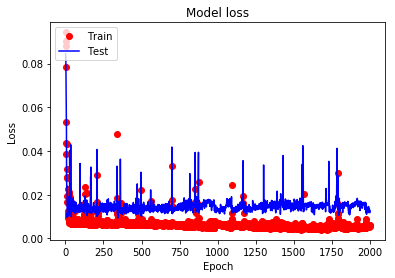

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', c = "red")
plt.plot(epochs, val_loss, 'b')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Some functions

In [38]:
def plot_prediction(model, test):
    x_test = test[:,0:(test.shape[1]-1)]
    y_predict_test = model.predict(x_test, batch_size = 1)
    y_predict_test.shape = (len(y_predict_test))

    dataset_invert = np.copy(test)
    dataset_invert[:, dataset_invert.shape[1]-1] = y_predict_test
    y_predict_test = scaler.inverse_transform(dataset_invert)[:, dataset_invert.shape[1]-1]
         
    test_tf = scaler.inverse_transform(test)
    x_original = test_tf[:, 0]
    y_original = test_tf[:, test_tf.shape[1]-1]

    plt.scatter(x_original, y_original)
    plt.scatter(x_original, y_predict_test)
    plt.show()

    print(np.corrcoef(y_original, y_predict_test))
    
def plot_training(model, x_t, y_t):  
    y_predict_test = model.predict(x_t, batch_size = 1)
    y_predict_test.shape = (y_predict_test.shape[0],)

    plt.scatter(x_t, y_t)
    plt.scatter(x_t, y_predict_test)
    plt.show()

    np.corrcoef(y_t, y_predict_test)


## Plot predictions epoch 1

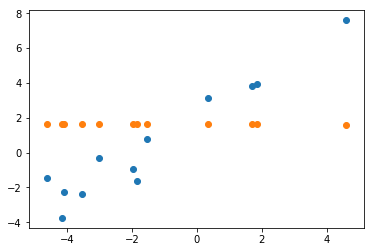

[[ 1.         -0.96212644]
 [-0.96212644  1.        ]]


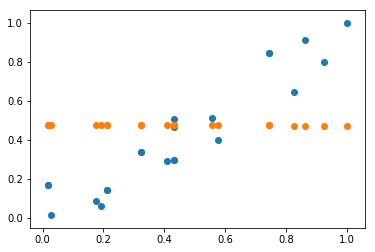

In [40]:
model.load_weights("../../models/weights-improvement-01-0.0953.hdf5")
plot_prediction(model, test)
plot_training(model, x_t, y_t)

   

## Plot predictions best validation

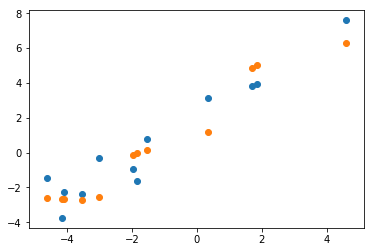

[[1.         0.92582258]
 [0.92582258 1.        ]]


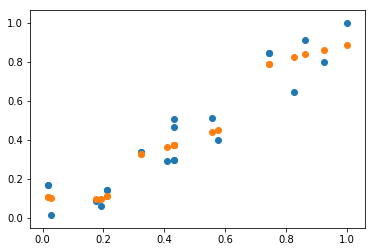

In [43]:
model.load_weights("weights-improvement-15-0.0121.hdf5")
plot_prediction(model, test)
plot_training(model, x_t, y_t)

## Plot prediction best epoch training

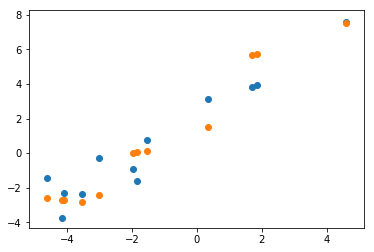

[[1.         0.93280617]
 [0.93280617 1.        ]]


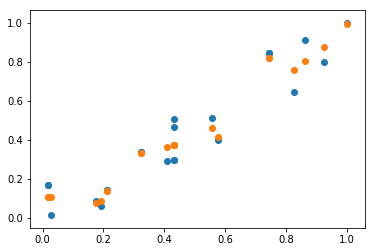

In [44]:
model.load_weights("../../models/weights-improvement-1549.hdf5")
plot_prediction(model, test)
plot_training(model, x_t, y_t)